In [1]:
# Import the Packages
from context import completiontools
import completiontools.utils as utils
import open3d as o3d
import numpy as np


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
utils.hello_world()

'hello world!'

In [2]:
# import a mesh
meshPath = "/Volumes/Data drive/Documents/Doctoraat Local/pointcloud-xr-completion/samples/BigFiles/GrondSampleMesh.obj"
#"/Volumes/Data drive/Documents/Doctoraat Local/XR Paper Data/Results/1_Campus/grond/GrondMeshPart.ply"#
mesh = utils.get_geometry(meshPath)


In [3]:
# import pointcloud
pcdPath = "/Volumes/Data drive/Documents/Doctoraat Local/pointcloud-xr-completion/samples/BigFiles/voxel_grond_pointcloud.ply"
#pcdPath = "/Volumes/Data drive/Documents/Doctoraat Local/XR Paper Data/Results/1_Campus/grond/GrondMeshPart.ply"
pcd = utils.get_geometry(pcdPath)


In [5]:
utils.show_geometries([mesh])


In [ ]:
# Create the convex hull
pcl = mesh.sample_points_poisson_disk(number_of_points=10000)
hull, _ = pcl.compute_convex_hull()
hull_ls = o3d.geometry.LineSet.create_from_triangle_mesh(hull)
hull_ls.paint_uniform_color((1, 0, 0))
o3d.visualization.draw_geometries([mesh, hull_ls])


In [ ]:
# filter the point cloud with the Hull
hullVerts = np.asarray(hull.vertices)
points = np.asarray(pcd.points)
idxs = utils.get_indices_in_hull(points, hullVerts)
pcd_in_hull = pcd.select_by_index(idxs)


In [ ]:
utils.show_geometries([pcd_in_hull, hull_ls])


In [ ]:
# distance filtering the original point cloud
dists = pcd_in_hull.compute_point_cloud_distance(pcl)
dists = np.asarray(dists)
ind = np.where(dists < 0.05)[0]
pcd_without_mesh = pcd_in_hull.select_by_index(ind)


In [ ]:
utils.show_geometries([pcd_without_mesh])


In [ ]:
# distance filtering the new point cloud
dists = pcl.compute_point_cloud_distance(pcd_in_hull)
dists = np.asarray(dists)
ind = np.where(dists > 0.05)[0]
pcl_new, pcl_out = utils.filter_pcd_by_distance(pcl, pcd_in_hull, 0.05)


In [ ]:
utils.show_geometries([pcl_new, pcd_without_mesh])


In [ ]:
# combining the 2 pointclouds
combined_pcd = pcl_new + pcd_without_mesh


In [ ]:

utils.show_geometries([combined_pcd])


In [ ]:
# add the rest of the existing point cloud back
pcd_out_hull = pcd.select_by_index(idxs, True)
finalPcd = pcd_out_hull + combined_pcd


In [ ]:

utils.show_geometries([finalPcd])


# paper Images


## Display the Hull

In [1]:
# Import the Packages
from context import jellecomplete
import jellecomplete.utils as utils
import jellecomplete.complete as complete
import open3d as o3d
import numpy as np

meshPath = "/Volumes/Data drive/Documents/Doctoraat Local/pointcloud-xr-completion/samples/BigFiles/GrondSampleMesh.obj"
mesh = utils.get_geometry(meshPath)
pcdPath = "K:\Projects\2025-03 Project FWO SB Jelle\7.Data\21-08 Campus grond\RAW Data\e57"
pcd = utils.get_geometry(pcdPath)

In [2]:
#show the convex Hullfilter of the point cloud
hull, _ = mesh.compute_convex_hull()
hull_ls = o3d.geometry.LineSet.create_from_triangle_mesh(hull)
hull_ls.paint_uniform_color((1, 0, 0))

hullVerts = np.asarray(hull.vertices)
points = np.asarray(pcd.points)
idxs = utils.get_indices_in_hull(points, hullVerts)
pcd_in_hull = pcd.select_by_index(idxs)


In [ ]:
utils.show_geometries([pcd_in_hull, hull_ls])

In [ ]:
utils.show_geometries([mesh])

## Show the points to be removed

In [3]:
# distance filtering the original point cloud
pcl = mesh.sample_points_poisson_disk(number_of_points=100000)
pcd_without_mesh, removedPoints = utils.filter_pcd_by_distance(pcd_in_hull, pcl, 0.1)
removedPoints.paint_uniform_color((1, 0, 0))

PointCloud with 8035 points.

In [4]:
utils.show_geometries([pcd_without_mesh, removedPoints])

## Show the added points

In [5]:
# distance filtering the new point cloud

_, AddedPoints = utils.filter_pcd_by_distance(pcl, pcd_in_hull, 0.05)
AddedPoints.paint_uniform_color((0, 0, 1))

PointCloud with 26261 points.

In [6]:
utils.show_geometries([pcd_without_mesh, AddedPoints])

In [7]:
pcd_out_hull = pcd.select_by_index(idxs, True)
newCombinedPcd = pcd_out_hull + AddedPoints + pcd_without_mesh
o3d.io.write_point_cloud("/Volumes/Data drive/Documents/Doctoraat Local/pointcloud-xr-completion/samples/BigFiles/newCombinedPcd.ply", newCombinedPcd)

True

## Open3d raycasting scene
open 3d provides useful distance calculations to meshes from point clouds and also convex hull calculations

### Convex hull filtering
create a raycasting scene and a convex hull

# Functionality check

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


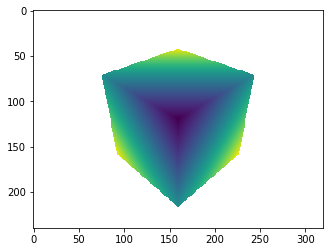

In [1]:
import open3d as o3d
import matplotlib.pyplot as plt

cube = o3d.t.geometry.TriangleMesh.from_legacy(
                                    o3d.geometry.TriangleMesh.create_box())

# Create scene and add the cube mesh
scene = o3d.t.geometry.RaycastingScene()
scene.add_triangles(cube)

# Rays are 6D vectors with origin and ray direction.
# Here we use a helper function to create rays for a pinhole camera.
rays = scene.create_rays_pinhole(fov_deg=60,
                                 center=[0.5,0.5,0.5],
                                 eye=[-1,-1,-1],
                                 up=[0,0,1],
                                 width_px=320,
                                 height_px=240)

# Compute the ray intersections.
ans = scene.cast_rays(rays)

# Visualize the hit distance (depth)
plt.imshow(ans['t_hit'].numpy())